<a href="https://colab.research.google.com/github/geroalbornoz/padrones/blob/master/sociedades_arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cuaderno del Registro Nacional de Sociedades de Argentina**

Este informe es un "cuaderno" realizado en lenguaje Python, pero la intención es que cualquier persona interesada pueda consutarlo, sin necesidad de que sepa de programación.
Este Informe  utiliza un Data Set público obtenido de la web oficial www.datos.gob.ar
Lo que se hizo es bajar el padrón completo ( .zip) y alojarlo en la nube en formato CSV. Hecho esto, podemos utilizarlo para ir obteniendo información que nos interese.
 
Esta es una primer versión, se irá actualizando con nuevos reportes o cambios para incorporar mejoras.
 
La descripción del padrón es la siguiente: "El Registro Nacional de Sociedades publica ciertos datos públicos provistos por AFIP a la 
Dirección del Registro Nacional de Sociedades y Concursos y Quiebras respecto de las 
personas jurídicas nacionales o extranjeras incluidas en la Ley 26.047 que estén inscriptas
 en cualquier registro público de comercio de las provincias argentinas y de la CABA.
 La fuente de estos datos corresponde al Padrón Federal de Personas Jurídicas de la 
 Administración Federal de Ingresos Públicos brindada al Ministerio de Justicia y Derechos Humanos 
 en el marco del Acuerdo de Colaboración suscripto para la implementación conjunta de la Ley 26.047 
 que crea el Registro Nacional de Sociedades previsto por el Artículo 8° de la Ley 19.550."
 
 
El padrón descargado se encuentra publicado en:
 https://datos.gob.ar/dataset/justicia-registro-nacional-sociedades/archivo/justicia_385fae21-3a26-4b13-8f1e-b4391e3da62e
 
 
 Si querés descargar el último padrón publicado en formato CSV (239MB):
 
 https://www.dropbox.com/s/8046gk9ph5kds67/registro-nacional-sociedades.csv?dl=0
 
 
# **Temas que trata el Informe en esta versión del Cuaderno:**
 
**Sección de Informes:**
 
. Qué información provee este padrón?
 
. Cual es la distribución de tipos societarios?
 
. Cual es la distribución por provincia? tomando el domicilio legal
 
. Cuales son los años que mas contratos sociales hubo? 
 
 
**Sección de Búsqueda de Info en el Padrón**
 
. Buscar los datos de una Sociedad Poniendo numero de CUIT 
 
. Buscar los datos de una Sociedad Poniendo Cómo empieza su Razón Social 
(Ej:"Banco de")
 
 
# **En futuras Versiones:**
.Cual es el conteo de Sociedades por código postal 
 
.Cuales son las calles en las que hay mas sociedades?
 
. Cual es la distribución en la ciudad de Rosario?
 
. Tendencias de creación de sociedades y su correlación con el crecimiento del producto bruto per cápita
 
. Obtener las actividades económicas de los CUIT, ver cuales son las actividades ecónomicas con mayor cantidad de Sociedades
 
 
# **Para consultas y sugerencias:**
Autor: CP Gerónimo Albornoz
geroalbornoz@gmail.com
 
@geroalbornoz (twitter y linkedin)
 
**Nota:** Este cuaderno es realizado únicamente a fines de practicar las distintas funciones y métodos de python en un caso real. No tiene fines comerciales ni ningún otro que el manifestado.

# **Instrucciones**
**Sección de Informes:**

Al ser una versión de solo lectura, al abrir el Cuaderno se ejecutan todos los Reportes, Consultas y gráficos.

**Sección de Búsqueda de Info en el Padrón**

. Haga click en cada celda y luego en el ícono de "ejecutar celda" que está a la izquierda (ícono de play) 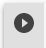

. Haga click en cada celda y apriete la combinación de teclas Control+Enter


Las celdas posteriores puede ejecutarlas o no, según si le interesa la información que reportan.

**Borrar Resultados**

Si querés limpiar la búsqueda y realizar otra, podés borrar resultados haciendo click en el ícono 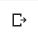 que se encuentra en la parte superior izquierda de la celda y luego apretar el ícono de la X

Si luego querés buscar nuevamente, hacés click de nuevo en el ícono de Play de la celda correspondiente.



# **Cuaderno - Sección de Informes:**


In [ ]:
#obtenemos el data set para analizar. Este paso tarda entre 3 y 20 segundos en descargar.
!wget -O sociedades.csv https://www.dropbox.com/s/8046gk9ph5kds67/registro-nacional-sociedades.csv?dl=0 #ctrl+click si queréds bajarte el data set completo


In [ ]:
#carga de los módulos de Python necesarios para el informe
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
plt.rcParams['figure.figsize'] = (19,9)

In [ ]:
#conversión en un objeto Data Frame (tabla)
df = pd.read_csv("sociedades.csv",sep=';', error_bad_lines=False,encoding='latin-1', header=0, index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#Ver las primeras y las últimas 10 filas del Data Set. Al pie se informa cantidad de filas y columnas.
#Se agrega la columna AÑO_CONTRATO_SOCIAL
df["DL_PROVINCIA"]=df["DL_PROVINCIA"].fillna("NO ESPECIFICADO")
df["TIPO_SOCIETARIO"]=df["TIPO_SOCIETARIO"].fillna("NO ESPECIFICADO")
df['AÑO_CONTRATO_SOCIAL'] = df['FECHA_CONTRATO_SOCIAL'].map(lambda x: str(x)[:4])
df['AÑO_CONTRATO_SOCIAL'].fillna(value=0)
df.astype({'AÑO_CONTRATO_SOCIAL': 'int32'},errors="ignore")



,RAZON_SOCIAL,FECHA_CONTRATO_SOCIAL,TIPO_SOCIETARIO,FECHA_ACTUALIZACION,NUMERO_INSCRIPCION,DF_PROVINCIA,DF_LOCALIDAD,DF_CALLE,DF_NUMERO,DF_PISO,DF_DEPARTAMENTO,DF_CP,DF_ESTADO_DOMICILIO,DL_PROVINCIA,DL_LOCALIDAD,DL_CALLE,DL_NUMERO,DL_PISO,DL_DEPARTAMENTO,DL_CP,DL_ESTADO_DOMICILIO,AÑO_CONTRATO_SOCIAL
CUIT,,,,,,,,,,,,,,,,,,,,,,
30500000127,SEGUROS SURA S.A,1912-04-30-10:43,SOCIEDAD ANONIMA,2020-05-15-12:13,NaN,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,"GRIERSON,CECILIA BOULEVARD",255.0,1,NaN,1107.0,CONFIRMADO,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,"GRIERSON,CECILIA BOULEVARD",255.0,1,NaN,1107.0,DECLARADO,1912
30500000747,BANCO COMERCIAL DE TRES ARROYOS S A,1906-09-01-00:00,SOCIEDAD ANONIMA,2019-07-24-05:04,NaN,BUENOS AIRES,TRES ARROYOS,BETOLAZA,189.0,NaN,NaN,7500.0,INEXISTENTE - DESCONOCIDO,BUENOS AIRES,TRES ARROYOS,AV MORENO,300.0,NaN,NaN,7500.0,NO CONFIRMADO,1906
30500001042,BANCO COMERCIAL DEL TANDIL S A,1964-03-21-00:00,SOCIEDAD ANONIMA,2018-11-13-16:55,NaN,BUENOS AIRES,TANDIL,GRAL PINTO,602.0,NaN,NaN,7000.0,NO CONFIRMADO,BUENOS AIRES,TANDIL,GRAL PINTO,602.0,NaN,NaN,7000.0,NO CONFIRMADO,1964
30500001115,BOSTON COMPAÑIA ARGENTINA DE SEGUROS S A,1925-02-19-11:00,SOCIEDAD ANONIMA,2020-02-18-08:47,NaN,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,SUIPACHA,268.0,03,NaN,1008.0,CONFIRMADO,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,SUIPACHA,268.0,03,NaN,1008.0,DECLARADO,1925
30500001352,BANCO DE CREDITO COMERCIAL,1913-03-10-00:00,SOCIEDAD ANONIMA,2018-11-13-16:55,NaN,SANTA FE,SANTA FE,SAN MARTIN,2498.0,NaN,NaN,3000.0,INEXISTENTE - DESCONOCIDO,SANTA FE,SANTA FE,SAN MARTIN,2498.0,NaN,NaN,3000.0,NO CONFIRMADO,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34688133345,ASOCIACION SURE#A DE ARBITROS DE VOLEIBOL,1997-06-30-00:00,ASOCIACION CIVIL,2020-05-08-15:11,NaN,BUENOS AIRES,BAHIA BLANCA,COPAHUE,312.0,NaN,NaN,8000.0,CONFIRMADO,BUENOS AIRES,BAHIA BLANCA,COPAHUE,312.0,NaN,NaN,8000.0,CONFIRMADO,1997
34688233358,FANCON SA,1997-10-20-00:00,SOCIEDAD ANONIMA,2020-04-08-08:12,NaN,BUENOS AIRES,LOMAS DE ZAMORA,ESPAÑA,389.0,6,B,1832.0,DECLARADO,BUENOS AIRES,LOMAS DE ZAMORA,ESPA#A,393.0,NaN,NaN,1832.0,CONFIRMADO,1997
34688333360,SE IN CO S R L,1997-04-04-00:00,SOCIEDAD DE RESPONSABILIDAD LIMITADA,2019-11-25-11:12,NaN,BUENOS AIRES,CAMPANA,SALMINI,975.0,NaN,NaN,2804.0,DECLARADO,CIUDAD AUTONOMA BUENOS AIRES,CAPITAL FEDERAL,MITRE BARTOLOME,226.0,06,NaN,1036.0,NO CONFIRMADO,1997


**¿Qué información provee este padrón? - Listado de Columnas**

In [ ]:
df.info() #ver las columnas que posee, cuantos campos completos tiene cada columna y qué tipo de objeto son

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025773 entries, 30500000127 to 34697633482
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   RAZON_SOCIAL           1025773 non-null  object 
 1   FECHA_CONTRATO_SOCIAL  1014582 non-null  object 
 2   TIPO_SOCIETARIO        1025773 non-null  object 
 3   FECHA_ACTUALIZACION    892692 non-null   object 
 4   NUMERO_INSCRIPCION     0 non-null        float64
 5   DF_PROVINCIA           995271 non-null   object 
 6   DF_LOCALIDAD           995244 non-null   object 
 7   DF_CALLE               995100 non-null   object 
 8   DF_NUMERO              995220 non-null   float64
 9   DF_PISO                330337 non-null   object 
 10  DF_DEPARTAMENTO        261140 non-null   object 
 11  DF_CP                  995277 non-null   float64
 12  DF_ESTADO_DOMICILIO    995277 non-null   object 
 13  DL_PROVINCIA           1025773 non-null  object 
 14  DL_L

**¿Cúal es el conteo de cada tipo societario?**

In [ ]:
#Ver Listado de Tipo Societario
print("Total de Sociedades en el padrón: ", df["TIPO_SOCIETARIO"].value_counts().sum(),'\n')
print("TIPO SOCIETARIO{:>50}".format('CANTIDAD'))
print("-"*65)
df["TIPO_SOCIETARIO"].value_counts() 


Total de Sociedades en el padrón:  1025773 

TIPO SOCIETARIO                                          CANTIDAD
-----------------------------------------------------------------


SOCIEDAD DE RESPONSABILIDAD LIMITADA                      393900
SOCIEDAD ANONIMA                                          347962
ASOCIACION CIVIL                                          108480
COOPERATIVA                                                31531
SOCIEDAD POR ACCION SIMPLIFICADA                           28198
NO ESPECIFICADO                                            25429
SOCIEDAD LEY 19550 CAPITULO I SECCION IV                   20741
FUNDACION                                                  16220
ASOCIACION COOPERADORA                                      9118
COOPERATIVA EFECTORA                                        8507
SOCIEDAD EN COMANDITA POR ACCIONES                          6744
SOCIEDAD COLECTIVA                                          5795
SOCIEDAD EN COMANDITA SIMPLE                                5609
SUCURSAL EMPRESA EXTRANJERA                                 5358
SOCIEDAD EXTRANJERA                                         4935
ASOCIACION MUTUAL        

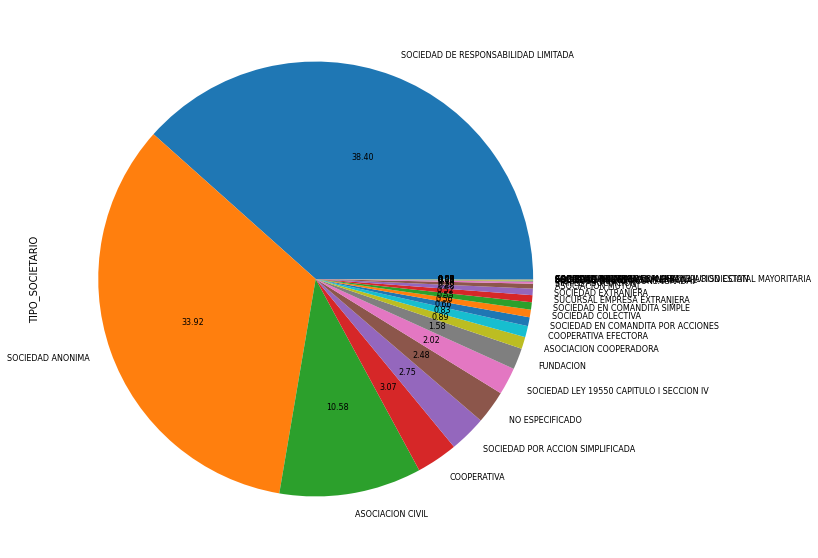

In [ ]:
#Ver Gráfico de Tipo Societario
df["TIPO_SOCIETARIO"].value_counts().plot(legend=False,mark_right=False, kind="pie", rot=45,autopct='%.2f',fontsize=8,figsize=(10, 10))

**Cuál es la Cantidad de Sociedades por Provincia?**

In [ ]:
#Ver Listado de Cantidad de Sociedades por Provincia
print("Total de Sociedades en el padrón: ", df["DL_PROVINCIA"].value_counts().sum(),'\n')
print("PROVINCIA{:>30}".format('CANTIDAD'))
print("-"*40)
df["DL_PROVINCIA"].value_counts()

Total de Sociedades en el padrón:  1025773 

PROVINCIA                      CANTIDAD
----------------------------------------


CIUDAD AUTONOMA BUENOS AIRES    443289
BUENOS AIRES                    212437
SANTA FE                         73043
CORDOBA                          69093
MENDOZA                          40721
TUCUMAN                          18730
ENTRE RIOS                       15433
SALTA                            14553
CHACO                            13293
CORRIENTES                       12819
RIO NEGRO                        12487
MISIONES                         12458
SAN JUAN                         11080
CHUBUT                           10484
NEUQUEN                          10422
SAN LUIS                          9996
SANTIAGO DEL ESTERO               8866
JUJUY                             7287
LA PAMPA                          6737
LA RIOJA                          4692
SANTA CRUZ                        4575
TIERRA DEL FUEGO                  4483
FORMOSA                           4431
CATAMARCA                         4334
NO ESPECIFICADO                     30
Name: DL_PROVINCIA, dtype

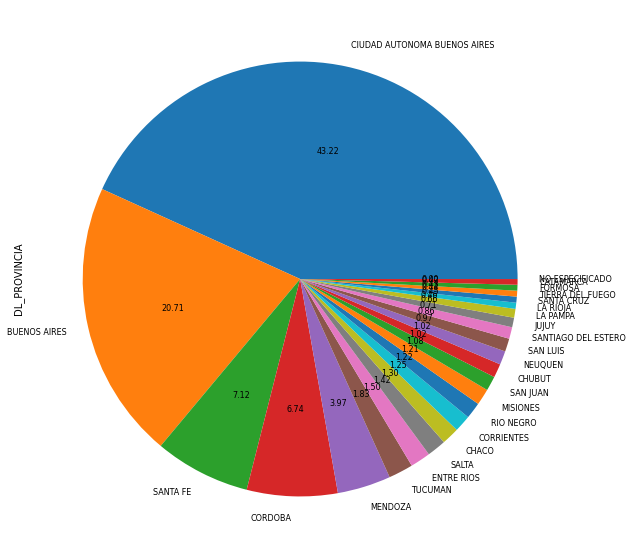

In [ ]:
#Ver Gráfico de Cantidad de Sociedades por Provincia
df["DL_PROVINCIA"].value_counts().plot(legend=False,kind="pie", rot=85,autopct='%.2f',fontsize=8,figsize=(10, 10))
                                                                                                          

**Cuál es la Cantidad de Contratos por año?**

In [ ]:
#Ver Listado de Contratos por Año
top=10
print("Total de Sociedades en el padrón: ", df["AÑO_CONTRATO_SOCIAL"].value_counts().sum(),'\n')
print("Se muestra el top",top,"de cantidad de Contratos por año",'\n')
print("AÑO{:>10}".format('CANTIDAD'))
print("-"*15)
df["AÑO_CONTRATO_SOCIAL"].value_counts().head(top)


Total de Sociedades en el padrón:  1025773 

Se muestra el top 10 de cantidad de Contratos por año 

AÑO  CANTIDAD
---------------


2003    31455
2018    31321
2006    31188
2007    30843
2004    30658
2012    30236
2017    30230
2019    29628
2005    29307
2011    28250
Name: AÑO_CONTRATO_SOCIAL, dtype: int64

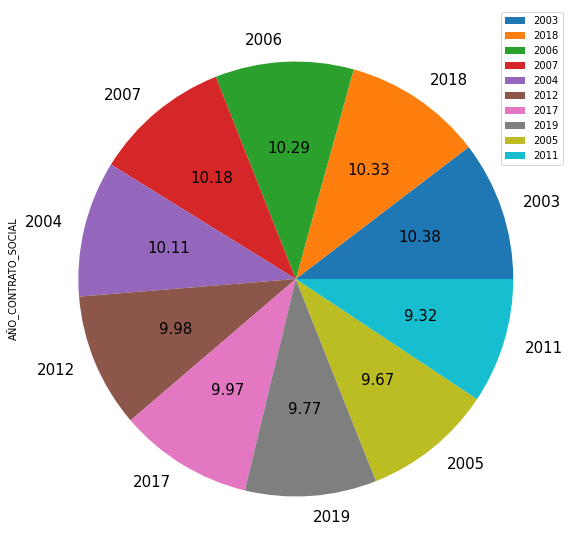

In [ ]:
#Ver Gráfico de Tipo Societario
df["AÑO_CONTRATO_SOCIAL"].value_counts().head(top).plot(legend=True, rot=85, kind="pie",autopct='%.2f',fontsize=15,figsize=(10, 10))
#df["AÑO_CONTRATO_SOCIAL"].value_counts().plot.kde() # para investigar

**Cual es la distribución de tipo societario en una provincia determinada?**

In [ ]:
#Haga Click en la Celda y luego Play para empezar
PROVINCIA = input("Escriba una Provincia y presione Enter: ") 
df2 = df.loc[lambda df: df['DL_PROVINCIA'] == PROVINCIA.upper()]

Escriba una Provincia y presione Enter: San juan


In [ ]:
#Ver Listado de Sociedades de la Provincia Seleccionada
print("Cantidad de Tipos Societarios de", PROVINCIA,'\n')
print("Total: ", df2["DL_PROVINCIA"].value_counts().sum(),'\n')
df2["TIPO_SOCIETARIO"].value_counts()

Cantidad de Tipos Societarios de San juan 

Total:  11080 



SOCIEDAD DE RESPONSABILIDAD LIMITADA        5335
SOCIEDAD ANONIMA                            2139
ASOCIACION CIVIL                            1763
COOPERATIVA                                  615
SOCIEDAD POR ACCION SIMPLIFICADA             483
FUNDACION                                    243
NO ESPECIFICADO                              128
SOCIEDAD LEY 19550 CAPITULO I SECCION IV     113
SOCIEDAD EN COMANDITA SIMPLE                  70
ASOCIACION MUTUAL                             49
SOCIEDAD EXTRANJERA                           36
COOPERATIVA EFECTORA                          32
SOCIEDAD COLECTIVA                            19
SUCURSAL EMPRESA EXTRANJERA                   15
INSTITUTO DE VIDA CONSAGRADA                  12
ASOCIACION COOPERADORA                         9
SOCIEDAD DEL ESTADO                            7
SIMPLE ASOCIACION                              5
SOCIEDAD EN COMANDITA POR ACCIONES             2
SOCIEDAD ANONIMA UNIPERSONAL                   2
ECONOMIA MIXTA      

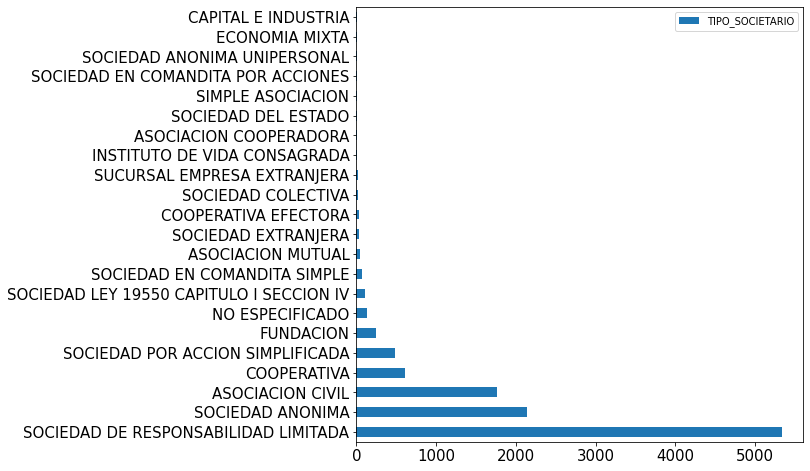

In [ ]:
#Ver Gráfico de Tipo Societario de la Provincia Seleccionada
df2["TIPO_SOCIETARIO"].value_counts().plot(legend=True, rot=0, kind="barh",fontsize=15,figsize=(8, 8))
#df["AÑO_CONTRATO_SOCIAL"].value_counts().plot.kde() # para investigar

# **Cuaderno - Sección de Búsquedas:**

**Buscar la Información de un determinado CUIT**

In [ ]:
#Haga Click en la Celda y luego Play para empezar
NUMERO_CUIT = input("Escriba la CUIT (sin puntos ni guiones) y presione Enter: ") 
print("La CUIT seleccionada es", NUMERO_CUIT)

In [ ]:
#Haga click en Play para ver la información de la CUIT
df.loc[NUMERO_CUIT:NUMERO_CUIT] 

**Buscar la Información de una determinada Razón Social**

In [ ]:
#Haga Click en la Celda y luego Play para empezar
RAZON = input("Escriba cómo empieza el nombre de la razon social y presione Enter: ") 
RAZON = RAZON.upper()
print("La Búsqueda seleccionada es", RAZON)

In [ ]:
#Haga click en Play para ver la información de la CUIT
df.loc[df["RAZON_SOCIAL"].str.startswith(RAZON)]